<a href="https://colab.research.google.com/github/itay-hilel/food-classifications/blob/master/food_FINDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
from  google.colab import drive

In [0]:
from fastai.vision import *


In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/My Drive/AI_Projects/'

In [0]:
(Path(root_path)/'food').mkdir(parents=True, exist_ok=True)

In [0]:
proj_path = 'gdrive/My Drive/AI_Projects/food/'


In [0]:
folders = ['pizza','Hotdog','Kebab','Frenchfries','Hamburger','Taco','Falafel','Corn']

In [0]:
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [0]:
p_path = Path(proj_path)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [30]:

data.classes

['Corn',
 'Falafel',
 'Frenchfries',
 'Hamburger',
 'Hotdog',
 'Kebab',
 'Taco',
 'pizza']

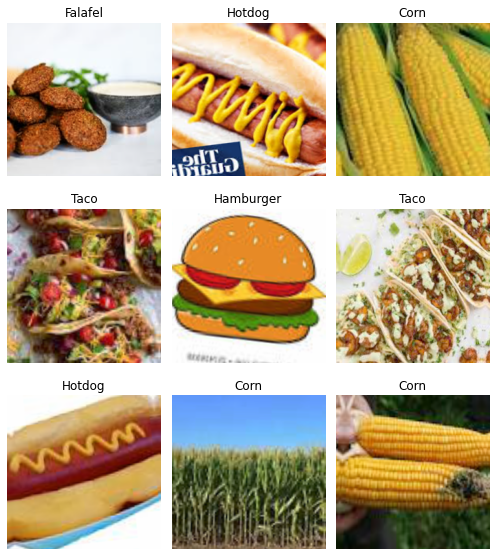

In [31]:
data.show_batch(rows=3,figsize=(7,8))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['Corn',
  'Falafel',
  'Frenchfries',
  'Hamburger',
  'Hotdog',
  'Kebab',
  'Taco',
  'pizza'],
 8,
 270,
 67)

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [34]:
# train 8 times the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.554383,2.546421,0.716418,01:53
1,2.800303,0.984835,0.283582,01:31
2,2.086275,0.896738,0.253731,01:31
3,1.621012,0.900109,0.238806,01:30
4,1.308074,0.852824,0.208955,01:30
5,1.091241,0.795520,0.208955,01:30
6,0.930062,0.772883,0.238806,01:32
7,0.801571,0.778154,0.238806,01:30


In [35]:
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/food/models/model1_34.pth')

In [0]:
learn.unfreeze()

In [37]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

ValueError: ignored

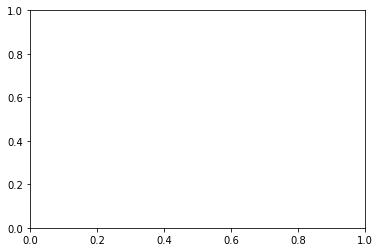

In [39]:
learn.recorder.plot()

In [38]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [0]:
learn.save('model2_34')

In [41]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

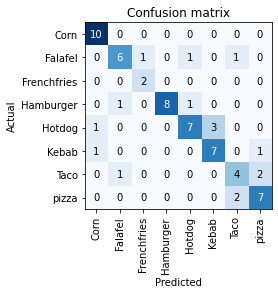

In [42]:
interp.plot_confusion_matrix()


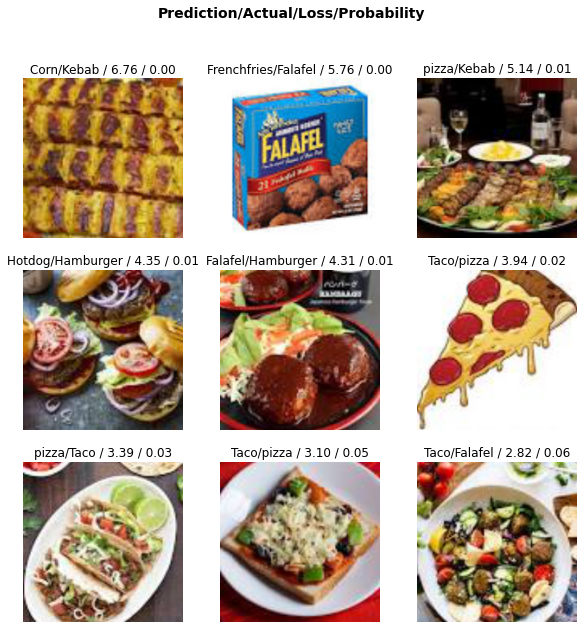

In [43]:
interp.plot_top_losses(9, figsize=(10,10))

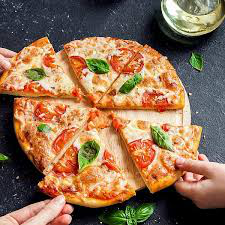

In [50]:
#testing
img_burger= open_image(Path(root_path)/'test'/'imagest.jpg')
img_burger

In [51]:
pred_class,pred_idx,outputs = learn.predict(img_burger)
pred_class

Category tensor(7)